### Task 1 - Data Collection
Here you will obtain the required data for the analysis. As described in the project instructions, you will perform a web scrap to obtain data from the NCDC website, import data from the John Hopkins repository, and import the provided external data.


### A - NCDC Website scrap
Website - https://covid19.ncdc.gov.ng/

In [1]:
# Write Your Code Below
# Import all libraries in this cell
import requests
import numpy as np
import urllib.request
import pandas as pd
import csv
from bs4 import BeautifulSoup
import seaborn as sns
sns.set_style("darkgrid")
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')  
import warnings
warnings.filterwarnings('ignore')
import time

In [10]:
# Save the data to a DataFrame object.
start = time.time()
page_content = requests.get('https://covid19.ncdc.gov.ng/')
soup = BeautifulSoup(page_content.content, 'html.parser')
table = soup.find('table')
table_headers, table_rows = [], []
for i in table.thead.find_all('th'):
    title = i.text.strip()
    table_headers.append(title)
for j in table.tbody.find_all('tr'):
    for k in j.find_all('td'):
        table_rows.append(k.text.strip())
table_rows = np.array(table_rows).reshape(37, 5)
ncdc_data_from_soup = pd.DataFrame(table_rows, columns = table_headers)
print('Runtime speed for Beautiful Soup parsing: ', time.time() - start)

Runtime speed for Beautiful Soup parsing:  1.0982813835144043


In [11]:
""" start = time.time()
ncdc_data_from_pandas = pd.read_html('https://covid19.ncdc.gov.ng/')[0]
print('Runtime speed for Pandas parsing: ', time.time() - start) """

Runtime speed for Pandas parsing:  1.5670907497406006


In [12]:
# We'll go with Beautiful Soup parsing since it is mostly performing better than Pandas parsing
ncdc_data = ncdc_data_from_soup

### B - John Hopkins Data Repository
Here you will obtain data from the John Hopkins repository. Your task here involves saving the data from the GitHub repo link to DataFrame for further analysis. Find the links below. 
* Global Daily Confirmed Cases - Click [Here](https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv)
* Global Daily Recovered Cases - Click [Here](https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv)
* Global Daily Death Cases - Click [Here](https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv)

In [13]:
daily_confirmed = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
daily_recovered = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')
daily_death = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')

### C - External Data 
* Save the external data to a DataFrame
* External Data includes but not limited to: `covid_external.csv`, `Budget data.csv`, `RealGDP.csv`

In [14]:
vulner_index = pd.read_csv('covid_external.csv')
budget_data = pd.read_csv('Budget data.csv')
gdp_data = pd.read_csv('RealGDP.csv')

### Task 2 - View the data
Obtain basic information about the data using the `head()` and `info()` method.

In [15]:
print(ncdc_data.info())
ncdc_data.head(10) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   States Affected               37 non-null     object
 1   No. of Cases (Lab Confirmed)  37 non-null     object
 2   No. of Cases (on admission)   37 non-null     object
 3   No. Discharged                37 non-null     object
 4   No. of Deaths                 37 non-null     object
dtypes: object(5)
memory usage: 1.6+ KB
None


,States Affected,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths
0,Lagos,"99,922","1,091","98,062",769
1,FCT,"28,721",45,"28,427",249
2,Rivers,"16,747",70,"16,523",154
3,Kaduna,"11,314",8,"11,217",89
4,Plateau,"10,256",0,"10,181",75
5,Oyo,"10,231",1,"10,028",202
6,Edo,"7,696",2,"7,373",321
7,Ogun,"5,810",11,"5,717",82
8,Delta,"5,411",130,"5,170",111
9,Ondo,"5,173",315,"4,749",109


In [16]:
print(daily_confirmed.info())
daily_confirmed.head(10) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285 entries, 0 to 284
Columns: 885 entries, Province/State to 6/20/22
dtypes: float64(2), int64(881), object(2)
memory usage: 1.9+ MB
None


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/11/22,6/12/22,6/13/22,6/14/22,6/15/22,6/16/22,6/17/22,6/18/22,6/19/22,6/20/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,180864,180864,181120,181178,181236,181465,181534,181574,181666,181725
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,276690,276731,276731,276821,276821,276821,277141,277141,277409,277444
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,265925,265927,265937,265943,265952,265964,265968,265971,265975,265985
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,43224,43224,43224,43224,43449,43449,43449,43449,43449,43449
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,99761,99761,99761,99761,99761,99761,99761,99761,99761,99761
5,NaN,Antarctica,-71.94990,23.347000,0,0,0,0,0,0,...,11,11,11,11,11,11,11,11,11,11
6,NaN,Antigua and Barbuda,17.06080,-61.796400,0,0,0,0,0,0,...,8479,8492,8531,8537,8537,8537,8555,8581,8581,8581
7,NaN,Argentina,-38.41610,-63.616700,0,0,0,0,0,0,...,9276618,9276618,9276618,9313453,9313453,9313453,9313453,9313453,9341492,9341492
8,NaN,Armenia,40.06910,45.038200,0,0,0,0,0,0,...,423006,423006,423006,423044,423044,423044,423044,423044,423044,423104
9,Australian Capital Territory,Australia,-35.47350,149.012400,0,0,0,0,0,0,...,140519,140519,141660,142629,143656,144597,145457,146264,147096,147942


In [17]:
print(daily_recovered.info())
daily_recovered.head(10) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Columns: 885 entries, Province/State to 6/20/22
dtypes: float64(2), int64(881), object(2)
memory usage: 1.8+ MB
None


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/11/22,6/12/22,6/13/22,6/14/22,6/15/22,6/16/22,6/17/22,6/18/22,6/19/22,6/20/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,NaN,Antarctica,-71.94990,23.347000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,NaN,Antigua and Barbuda,17.06080,-61.796400,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,NaN,Argentina,-38.41610,-63.616700,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,NaN,Armenia,40.06910,45.038200,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,Australian Capital Territory,Australia,-35.47350,149.012400,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
print(daily_death.info())
daily_death.head(10) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285 entries, 0 to 284
Columns: 885 entries, Province/State to 6/20/22
dtypes: float64(2), int64(881), object(2)
memory usage: 1.9+ MB
None


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/11/22,6/12/22,6/13/22,6/14/22,6/15/22,6/16/22,6/17/22,6/18/22,6/19/22,6/20/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,7709,7709,7710,7710,7710,7713,7713,7713,7713,7714
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,3497,3497,3497,3497,3497,3497,3497,3497,3497,3497
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,6875,6875,6875,6875,6875,6875,6875,6875,6875,6875
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,153,153,153,153,153,153,153,153,153,153
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,1900,1900,1900,1900,1900,1900,1900,1900,1900,1900
5,NaN,Antarctica,-71.94990,23.347000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,NaN,Antigua and Barbuda,17.06080,-61.796400,0,0,0,0,0,0,...,140,140,140,140,140,140,140,140,140,140
7,NaN,Argentina,-38.41610,-63.616700,0,0,0,0,0,0,...,128973,128973,128973,128994,128994,128994,128994,128994,129016,129016
8,NaN,Armenia,40.06910,45.038200,0,0,0,0,0,0,...,8629,8629,8629,8629,8629,8629,8629,8629,8629,8629
9,Australian Capital Territory,Australia,-35.47350,149.012400,0,0,0,0,0,0,...,68,68,68,68,68,74,74,74,75,78


In [19]:
print(vulner_index.info())
vulner_index.head(10) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   states                   37 non-null     object 
 1   region                   37 non-null     object 
 2   Population               37 non-null     int64  
 3   Overall CCVI Index       37 non-null     float64
 4   Age                      37 non-null     float64
 5   Epidemiological          37 non-null     float64
 6   Fragility                37 non-null     float64
 7   Health System            37 non-null     float64
 8   Population Density       37 non-null     float64
 9   Socio-Economic           37 non-null     float64
 10   Transport Availability  37 non-null     float64
 11  Acute IHR                37 non-null     float64
dtypes: float64(9), int64(1), object(2)
memory usage: 3.6+ KB
None


,states,region,Population,Overall CCVI Index,Age,Epidemiological,Fragility,Health System,Population Density,Socio-Economic,Transport Availability,Acute IHR
0,FCT,North Central,4865000,0.3,0.0,0.9,0.4,0.6,0.9,0.6,0.2,0.79
1,Plateau,North Central,4766000,0.4,0.5,0.4,0.8,0.3,0.3,0.5,0.3,0.93
2,Kwara,North Central,3524000,0.3,0.4,0.3,0.2,0.4,0.2,0.6,0.7,0.93
3,Nassarawa,North Central,2783000,0.1,0.3,0.5,0.9,0.0,0.1,0.6,0.5,0.85
4,Niger,North Central,6260000,0.6,0.0,0.6,0.3,0.7,0.1,0.8,0.8,0.84
5,Benue,North Central,6376000,0.5,0.7,0.5,0.7,0.4,0.4,0.3,0.5,0.91
6,Kogi,North Central,4970000,0.1,0.3,0.2,0.5,0.5,0.4,0.3,0.6,0.87
7,Bauchi,North East,7270000,0.8,0.1,0.2,0.8,0.8,0.2,0.8,0.8,0.85
8,Gombe,North East,3692000,1.0,0.4,0.4,0.9,0.9,0.3,0.8,0.7,0.83
9,Borno,North East,6651000,0.9,0.3,0.1,1.0,1.0,0.1,0.7,0.9,0.89


In [20]:
print(gdp_data.info())
gdp_data.head(10) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    7 non-null      int64  
 1   Q1      7 non-null      float64
 2   Q2      7 non-null      float64
 3   Q3      7 non-null      float64
 4   Q4      7 non-null      float64
dtypes: float64(4), int64(1)
memory usage: 408.0 bytes
None


,Year,Q1,Q2,Q3,Q4
0,2014,15438679.50,16084622.31,17479127.58,18150356.45
1,2015,16050601.38,16463341.91,17976234.59,18533752.07
2,2016,15943714.54,16218542.41,17555441.69,18213537.29
3,2017,15797965.83,16334719.27,17760228.17,18598067.07
4,2018,16096654.19,16580508.07,18081342.10,19041437.59
5,2019,16434552.65,16931434.89,18494114.17,19530000.00
6,2020,16740000.00,15890000.00,17820000.00,0.00


In [21]:
print(budget_data.info())
budget_data.head(10) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   states               37 non-null     object 
 1   Initial_budget (Bn)  37 non-null     float64
 2   Revised_budget (Bn)  37 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1016.0+ bytes
None


,states,Initial_budget (Bn),Revised_budget (Bn)
0,Abia,136.60,102.70
1,Adamawa,183.30,139.31
2,Akwa-Ibom,597.73,366.00
3,Anambra,137.10,112.80
4,Bauchi,167.20,128.00
5,Bayelsa,242.18,183.15
6,Benue,189.00,119.00
7,Borno,146.80,108.80
8,Cross River,1100.00,147.10
9,Delta,395.50,282.30


### Task 3 - Data Cleaning and Preparation
From the information obtained above, you will need to fix the data format. 
<br>
Examples: 
* Convert to appropriate data type.
* Rename the columns of the scraped data.
* Remove comma(,) in numerical data
* Extract daily data for Nigeria from the Global daily cases data

TODO A - Clean the scraped data

In [22]:
ncdc_data.head(3)

,States Affected,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths
0,Lagos,"99,922","1,091","98,062",769
1,FCT,"28,721",45,"28,427",249
2,Rivers,"16,747",70,"16,523",154


In [23]:
ncdc_data = ncdc_data.rename(columns = {'States Affected': 'State', 'No. of Cases (Lab Confirmed)': 'n_Confirmed', 
                 'No. of Cases (on admission)': 'n_Admitted', 'No. Discharged': 'n_Discharged',
                 'No. of Deaths': 'n_Dead'})

In [24]:
for column in ncdc_data.columns:
    if column != 'State':
        ncdc_data[column] = ncdc_data[column].apply(lambda x: int(x.replace(',', '')))

In [25]:
ncdc_data.head(3)

,State,n_Confirmed,n_Admitted,n_Discharged,n_Dead
0,Lagos,99922,1091,98062,769
1,FCT,28721,45,28427,249
2,Rivers,16747,70,16523,154


TODO B - Get a Pandas DataFrame for Daily Confirmed Cases in Nigeria. Columns are Date and Cases

In [26]:
ng_daily_confirmed = daily_confirmed[daily_confirmed['Country/Region'] == 'Nigeria'].drop(['Province/State', 'Country/Region', 'Lat', 'Long'], axis = 1)
ng_daily_confirmed = ng_daily_confirmed.melt(var_name = 'Date', value_name = 'Cases')
ng_daily_confirmed['Date'] = pd.to_datetime(ng_daily_confirmed['Date'])

In [27]:
ng_daily_confirmed[100:103]

,Date,Cases
100,2020-05-01,2170
101,2020-05-02,2388
102,2020-05-03,2558


TODO C - Get a Pandas DataFrame for Daily Recovered Cases in Nigeria. Columns are Date and Cases

In [28]:
ng_daily_recovered = daily_recovered[daily_recovered['Country/Region'] == 'Nigeria'].drop(['Province/State', 'Country/Region', 'Lat', 'Long'], axis = 1)
ng_daily_recovered = ng_daily_recovered.melt(var_name = 'Date', value_name = 'Cases')
ng_daily_recovered['Date'] = pd.to_datetime(ng_daily_recovered['Date'])

In [29]:
ng_daily_recovered[100:103]

,Date,Cases
100,2020-05-01,351
101,2020-05-02,351
102,2020-05-03,400


TODO D - Get a Pandas DataFrame for Daily Death Cases in Nigeria. Columns are Date and Cases

In [30]:
ng_daily_death = daily_death[daily_death['Country/Region'] == 'Nigeria'].drop(['Province/State', 'Country/Region', 'Lat', 'Long'], axis = 1)
ng_daily_death = ng_daily_death.melt(var_name = 'Date', value_name = 'Cases')
ng_daily_death['Date'] = pd.to_datetime(ng_daily_death['Date'])

In [31]:
ng_daily_death[100:103]

,Date,Cases
100,2020-05-01,68
101,2020-05-02,85
102,2020-05-03,87


### Task 4 - Analysis
Here you will perform some analyses on the datasets. You are welcome to communicate findings in charts and summary. 
<br>
We have included a few TODOs to help with your analysis. However, do not let this limit your approach, feel free to include more, and be sure to support your findings with chart and summary 

TODO A - Generate a plot that shows the Top 10 states in terms of Confirmed Covid cases by Laboratory test

In [32]:
# After testing, nlargest runs faster than sort_values()
max_confirmed = ncdc_data.iloc[ncdc_data['n_Confirmed'].nlargest(10).index] 

In [33]:
# Setting up a theme aesthetic for subsequent plots
theme = sns.color_palette('Blues_r', 20)
paper_rc = {'lines.linewidth': 1, 'lines.markersize': 15}                  
sns.set_context('paper', rc = paper_rc) 

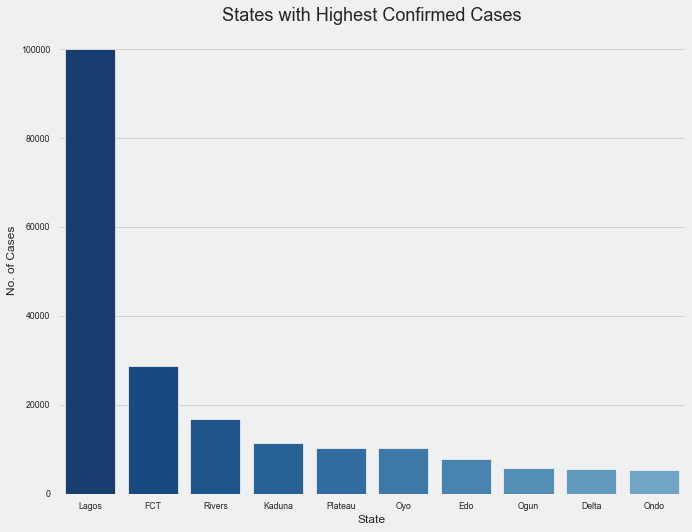

In [34]:
plt.figure(figsize = (10, 8))

plt.title('States with Highest Confirmed Cases', fontsize = 18)

sns.barplot(x = 'State', y = 'n_Confirmed', data = max_confirmed, palette = theme)

plt.xlabel('State', fontsize = 12)
plt.ylabel('No. of Cases', fontsize = 12)

#plt.savefig('States with Highest Confirmed Cases.png', dpi = 300, transparent = True)

plt.show()

In [35]:
# This plot shows that Lagos is by far the state with the highest number of confirmed cases.

TODO B - Generate a plot that shows the Top 10 states in terms of Discharged Covid cases. Hint - Sort the values

In [36]:
# After testing, nlargest runs faster than sort_values()
max_discharged = ncdc_data.iloc[ncdc_data['n_Discharged'].nlargest(10).index] 

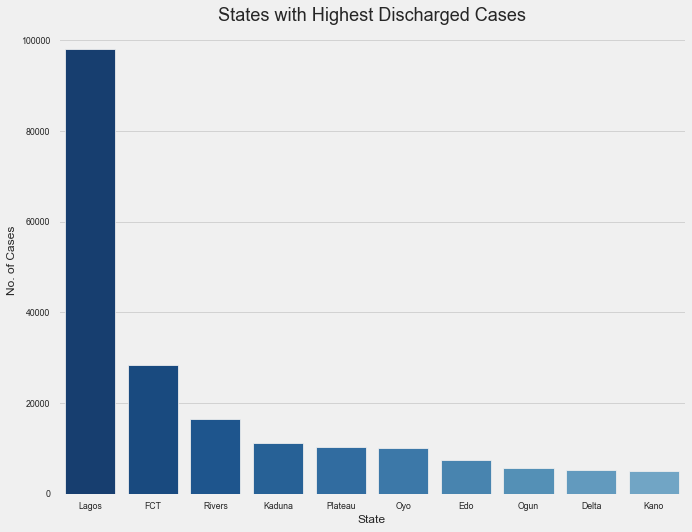

In [37]:
plt.figure(figsize = (10, 8))

plt.title('States with Highest Discharged Cases', fontsize = 18)

sns.barplot(x = 'State', y = 'n_Discharged', data = max_discharged, palette = theme)

plt.xlabel('State', fontsize = 12)
plt.ylabel('No. of Cases', fontsize = 12)

#plt.savefig('States with Highest Discharged Cases', dpi = 300, transparent = True)

plt.show()

In [38]:
# This plot shows that Lagos also records the highest number of discharged COVID patients.

TODO D - Plot the top 10 Death cases

In [39]:
# After testing, nlargest runs faster than sort_values()
max_deaths = ncdc_data.iloc[ncdc_data['n_Dead'].nlargest(10).index] 

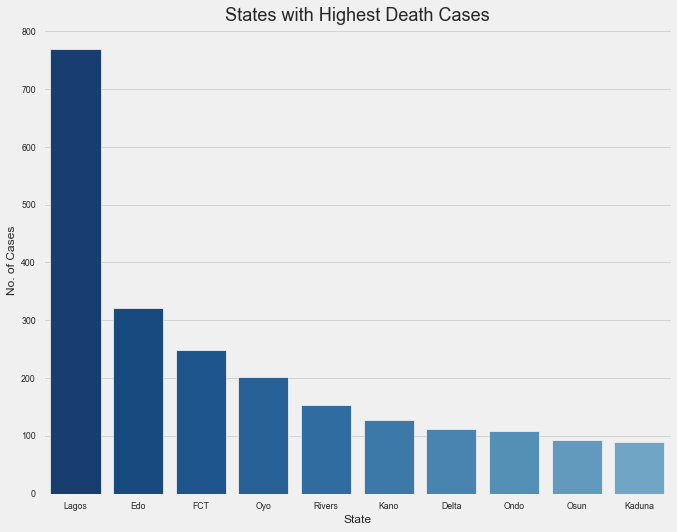

In [40]:
plt.figure(figsize = (10, 8))

plt.title('States with Highest Death Cases', fontsize = 18)

sns.barplot(x = 'State', y = 'n_Dead', data = max_deaths, palette = theme)

plt.xlabel('State', fontsize = 12)
plt.ylabel('No. of Cases', fontsize = 12)

#plt.savefig('States with Highest Death.png', dpi = 300, transparent = True)


plt.show()

In [41]:
# This plot tells us how Lagos also records the highest number of deaths attributed to COVID 19.

TODO E - Generate a line plot for the total daily confirmed, recovered and death cases in Nigeria

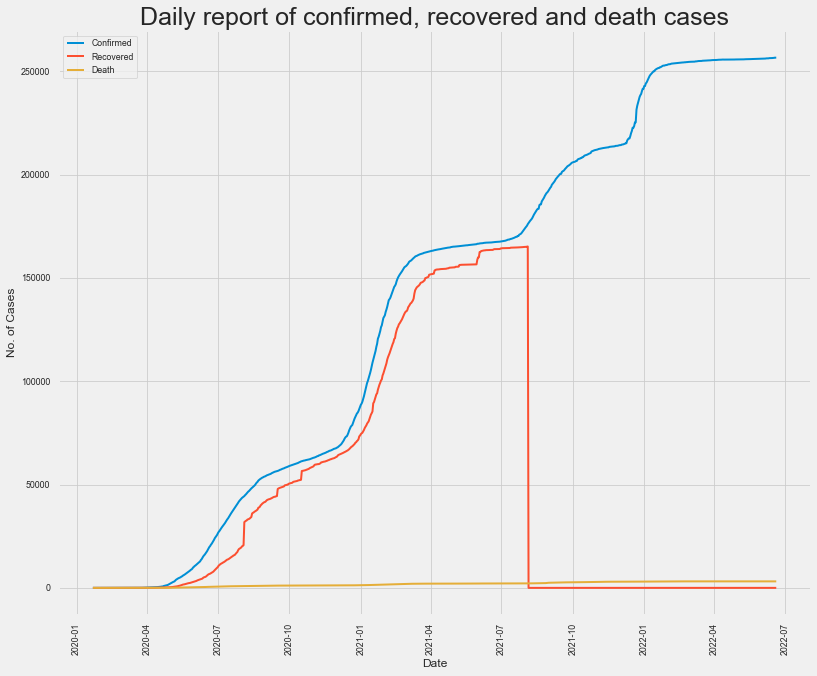

In [42]:
plt.figure(figsize = (12, 10))
plt.xticks(rotation = 90)
plt.ylabel('No. of Cases', fontsize = 12)
plt.xlabel('Date', fontsize = 12)
plt.title('Daily report of confirmed, recovered and death cases', fontsize = 25)

sns.lineplot(x = 'Date', y = 'Cases', data = ng_daily_confirmed, label = 'Confirmed', linewidth = 2)
sns.lineplot(x = 'Date', y = 'Cases', data = ng_daily_recovered, label = 'Recovered', linewidth = 2)
sns.lineplot(x = 'Date', y = 'Cases', data = ng_daily_death, label = 'Death', linewidth = 2)

#plt.savefig('Daily Report of Cases.png', dpi = 300, transparent = True)


plt.show()

In [43]:
# This plot shows
# 1. The rapid growth in the number of confirmed cases
# 2. The instant decline of COVID 19 recoveries between July and September, 2021
# 3. A slow but steady increase in the number of deaths 
# 4. The possible relation between falling recovery numbers and rising death records

TODO F - 
* Determine the daily infection rate, you can use the Pandas `diff` method to find the derivate of the total cases.
* Generate a line plot for the above

In [44]:
daily_infection_rate = ng_daily_confirmed['Cases'].diff()

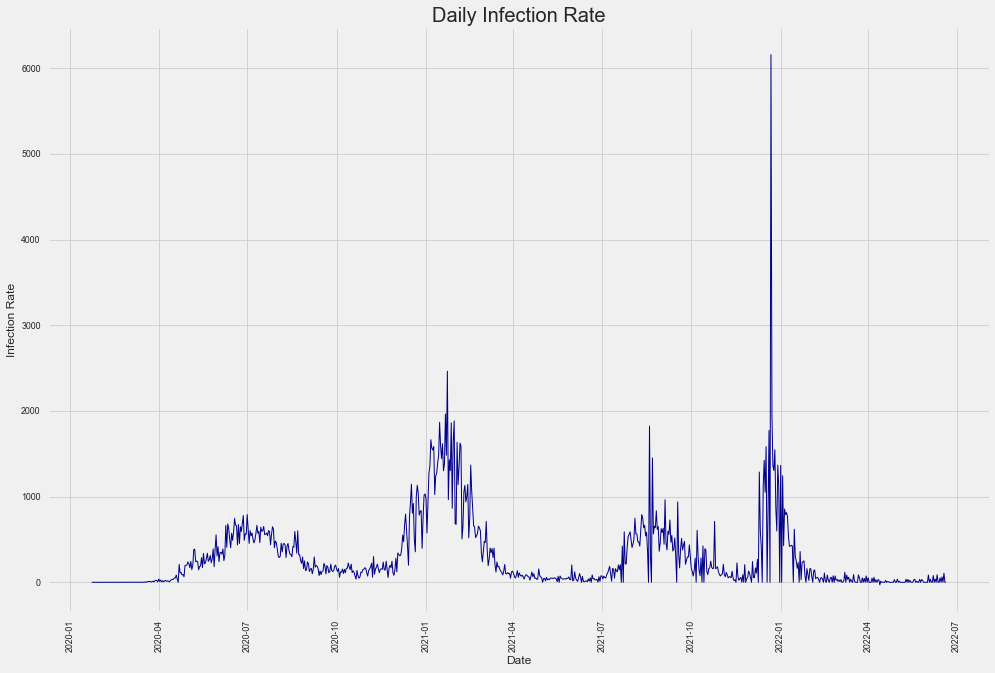

In [45]:
plt.figure(figsize = (15, 10))
plt.xticks(rotation = 90)
plt.ylabel('Infection Rate', fontsize = 12)
plt.xlabel('Date', fontsize = 12)
plt.title('Daily Infection Rate', fontsize = 20)

sns.lineplot(x = ng_daily_confirmed.Date, y = daily_infection_rate, linewidth = 1, color = 'darkblue', palette = theme)

#plt.savefig('Daily Infection Rate.png', dpi = 300, transparent = True)

plt.show()

In [46]:
# From this plot, we see COVID at its severest between December 2021 and January 2022

TODO G - 
* Calculate maximum infection rate for a day (Number of new cases)
* Find the date

In [47]:
print('Maximum infection rate: ', daily_infection_rate.max())

Maximum infection rate:  6158.0


In [48]:
print('Maximum infection rate was recorded on: ', ng_daily_confirmed.iloc[daily_infection_rate.idxmax()]['Date'])

Maximum infection rate was recorded on:  2021-12-22 00:00:00


TODO H - Determine the relationship between the external dataset and the NCDC COVID-19 dataset. 
Here you will generate a line plot of top 10 confirmed cases and the overall community vulnerability index on the same axis. From the graph, explain your observation.
<br>
Steps
* Combine the two dataset together on a common column(states)
* Create a new dataframe for plotting. This DataFrame will contain top 10 states in terms of confirmed cases i.e sort by confirmed cases. ** Hint: Check out Pandas [nlargest](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.nlargest.html) function. This [tutorial](https://cmdlinetips.com/2019/03/how-to-select-top-n-rows-with-the-largest-values-in-a-columns-in-pandas/) can help out ** 
* Plot both variable on the same axis. Check out this [tutorial](http://kitchingroup.cheme.cmu.edu/blog/2013/09/13/Plotting-two-datasets-with-very-different-scales/)

In [49]:
vulner_index = vulner_index.rename(columns = {'states': 'State'})

vulner_index['State'] = vulner_index['State'].replace('Nassarawa', 'Nasarawa')
vulner_index['State'] = vulner_index['State'].replace('Cross river', 'Cross River')

merged_data = ncdc_data.merge(vulner_index, on = 'State', how = 'left')

In [50]:
mini_merged_data = merged_data.iloc[merged_data['n_Confirmed'].nlargest(10).index]

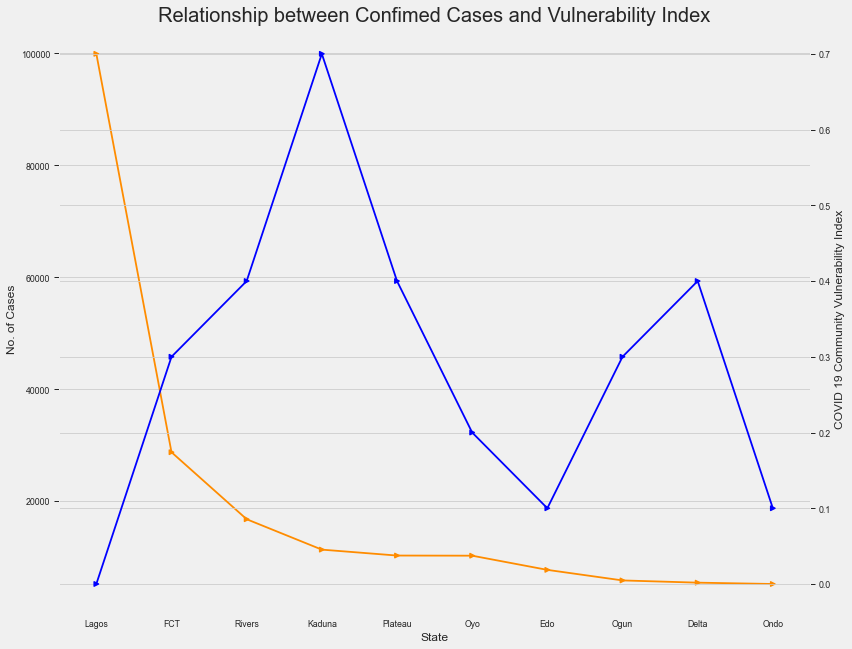

In [51]:
plt.figure(figsize = (12, 10))
plt.title('Relationship between Confimed Cases and Vulnerability Index', fontsize = 20)

axis_1 = sns.pointplot(x = 'State', y = 'n_Confirmed', data = mini_merged_data, color = 'darkorange', markers = '>')

plt.xlabel('State', fontsize = 12)
plt.ylabel('No. of Cases', fontsize = 12)

axis_2 = axis_1.twinx()

sns.pointplot(x = 'State', y = 'Overall CCVI Index', data = mini_merged_data, ax = axis_2, color = 'blue', markers = '>')

plt.ylabel('COVID 19 Community Vulnerability Index', fontsize = 12)

#plt.savefig('Confirmed Cases and Vulnerability Index.png', dpi = 300, transparent = True)

plt.show()

In [52]:
# Observation: This plot shows that CCVI Index has a weak and negative correlation with confirmed cases. In English, that means, 
# CCVI in itself holds little information on the number of confirmed cases in a state. The correlation being negative means a high value
# of CCVI Index results in associates to a low value in number of confirmed cases.

# Example: Lagos and Kaduna are great instances of the correlation being negative but the fact this does not occur in other states is
# what makes the correlation on a weak level.

TODO I - Determine the relationship between the external dataset and the NCDC COVID-19 dataset. 
* Here you will generate a regression plot between two variables to visualize the linear relationships - Confirmed Cases and Population Density.
Hint: Check out Seaborn [Regression Plot](https://seaborn.pydata.org/generated/seaborn.regplot.html).
* Provide a summary of your observation

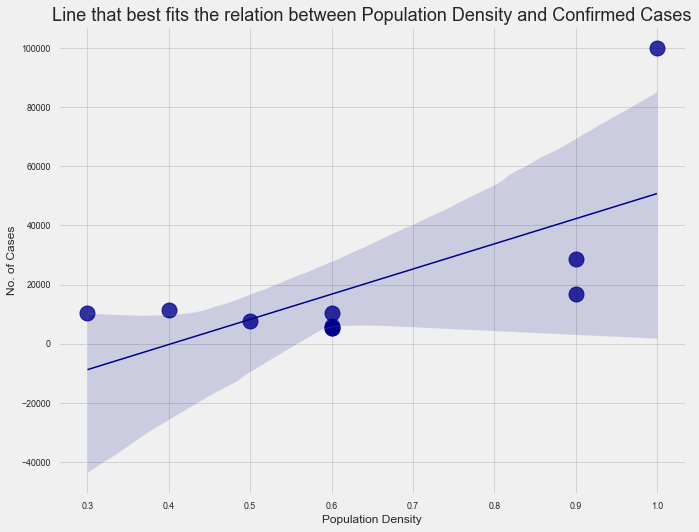

In [53]:
plt.figure(figsize=(10, 8))
plt.title('Line that best fits the relation between Population Density and Confirmed Cases', fontsize = 18)

sns.regplot(x = 'Population Density', y = 'n_Confirmed', data = mini_merged_data, color = 'darkblue')

plt.ylabel('No. of Cases', fontsize = 12)
plt.xlabel('Population Density', fontsize = 12)

#plt.savefig('Regplot.png', dpi = 300, transparent = True)

plt.show()

In [54]:
# This plot shows a positive correlation between population density and confirmed cases of an area.
# Studied carefully though, the 'line of best fit' that sns.regplot() returns captures perfectly only one
# data point. This shows that the two features have at best a moderate correlation.

# This means that a city with high population per area will fairly likely have high COVID cases. 

TODO J - 
* Provide more analyses by extending TODO G & H. Meaning, determine relationships between more features.
* Provide a detailed summary of your findings. 
* Note that you can have as many as possible.

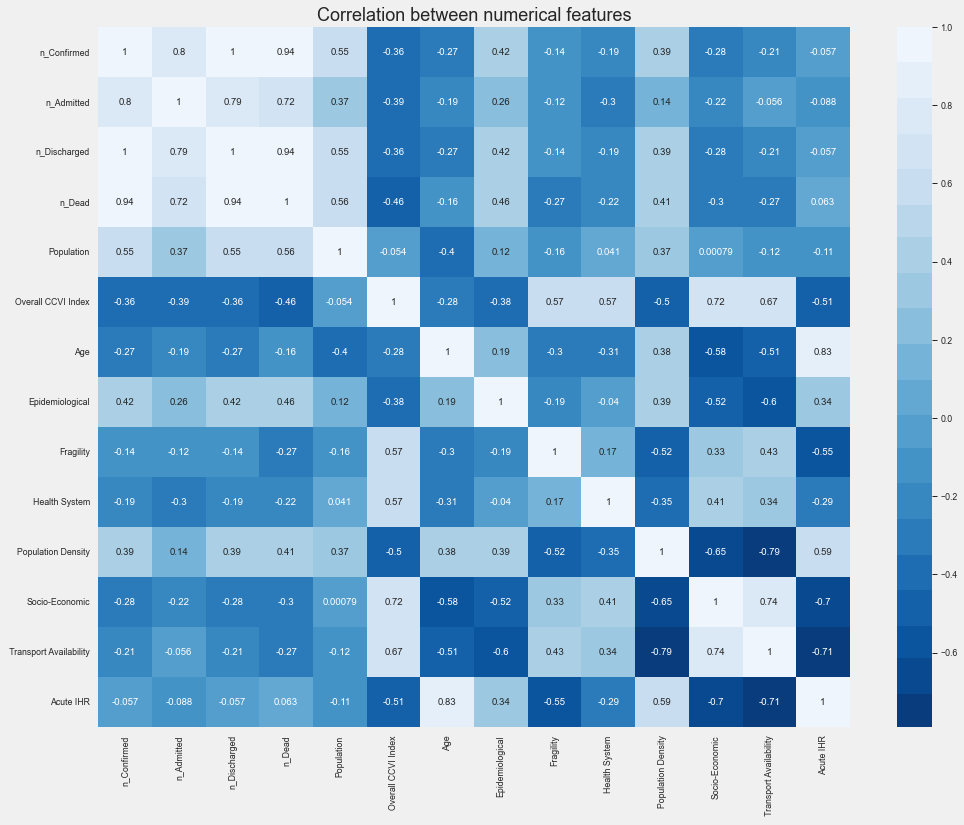

In [55]:
plt.figure(figsize = (15, 12))
plt.title('Correlation between numerical features', fontsize = 18)

sns.heatmap(merged_data.corr(), annot = True, cmap = theme, center = 0.1)

#plt.savefig('Correlation between numerical features.png', dpi = 300, transparent = True)

plt.show()

In [56]:
# The above heatmap shows the correlation between all variables in our data.
# From it, we can determine the correlation coefficient of every single feature with another

# Some of the correlations:

# 1. Age and Acute IHR (Very strong and positive)
#    This makes sense because our immune system gets weaker as we age. 

# 2. COVID Vulnerability and Socio-Economic status (Very strong and positive)
#    This conforms with the fact that urban areas may be easier to implement measures (e.g. lockdowns and mandatory face masks) 
#    to help curb the spread of COVID.

# 3. Transport and Population Density (Very strong and negative)
#    This says transport systems get clogged when there is a higher concentration of people to an area.

# 4. COVID Vulnerability and Health System (Strong and positive)
#    This agrees that the quality of health care in a place impacts its position on the CCVI index. 

# 5. Population and Socio-Economic status (Very weak and positive)
#    This says that population does not at all determine the standard of life. 

# 6. Number of Admitted Cases and Transport Availability (Very weak and negative)
#    This says there is no relation between the quality of transport of a place to admitted cases.

# 7. Number of Confirmed Cases and Population (Strong and positive) 
#    The number of confirmed cases will definitely grow higher with population increase.

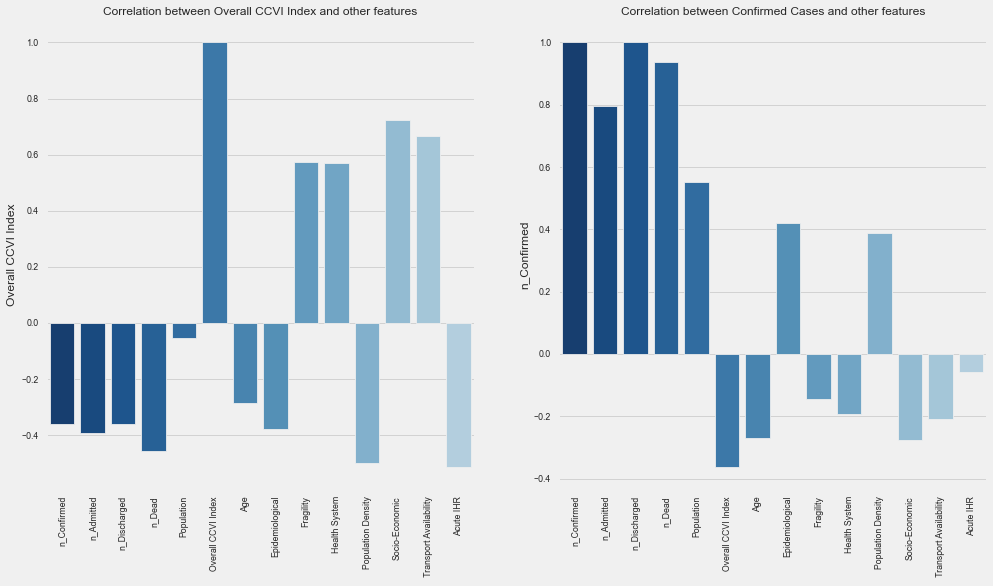

In [57]:
figure, axes = plt.subplots(1, 2, figsize = (15, 8))

xticklabels = axes[0].get_xticklabels()

axes[0].set_xticklabels(xticklabels, rotation = 90)
axes[0].set_title('Correlation between Overall CCVI Index and other features', fontsize = 12)
axes[0].set_ylabel('Overall CCVI Index', fontsize = 12)

axes[1].set_xticklabels(xticklabels, rotation = 90)
axes[1].set_title('Correlation between Confirmed Cases and other features', fontsize = 12)
axes[1].set_ylabel('No. of Cases', fontsize = 12)

sns.barplot(x = merged_data.corr().columns, y = merged_data.corr()['Overall CCVI Index'], ax = axes[0], palette = theme)
sns.barplot(x = merged_data.corr().columns, y = merged_data.corr()['n_Confirmed'], ax = axes[1], palette = theme)

#plt.savefig('Correlation between main features and others.png', dpi = 300, transparent = True)

plt.show()

In [58]:
# This plot shows the correlation between all other variables and the two main varibles (Vulnerability Index and Number of Confirmed Cases)

# From it, we get the features that drive our main variables the most.

# For Overall CCVI Index we have Socio-Economic status, Transport, Fragility and Health System as the main drivers. This will be proven below
# by plotting their relationship.

# As for Number of Confirmed Cases, Population seems to be the biggest driver (This is not taking into consideration obvious drivers like
# Number of Admitted, Discharged and Dead patients). 

In [59]:
def plot_relation(m_feature, features):
    for feature in features:
        if feature != m_feature:                                                
            
            plt.figure(figsize = (15, 12))
            plt.title('Relationship between ' + m_feature + ' and ' + feature, fontsize = 20)

            axis_1 = sns.pointplot(x = 'State', y = m_feature, data = merged_data, color = 'darkorange')

            plt.xlabel('State', fontsize = 12)
            plt.ylabel(m_feature, fontsize = 12)
            plt.xticks(rotation = 90)

            axis_2 = axis_1.twinx()

            sns.pointplot(x = 'State', y = feature, data = merged_data, ax = axis_2, color = 'darkblue')
 
            #plt.savefig(str('Relationship between ' + m_feature + ' and ' + feature + '.png'), dpi = 300, transparent = True)
            
            plt.show()

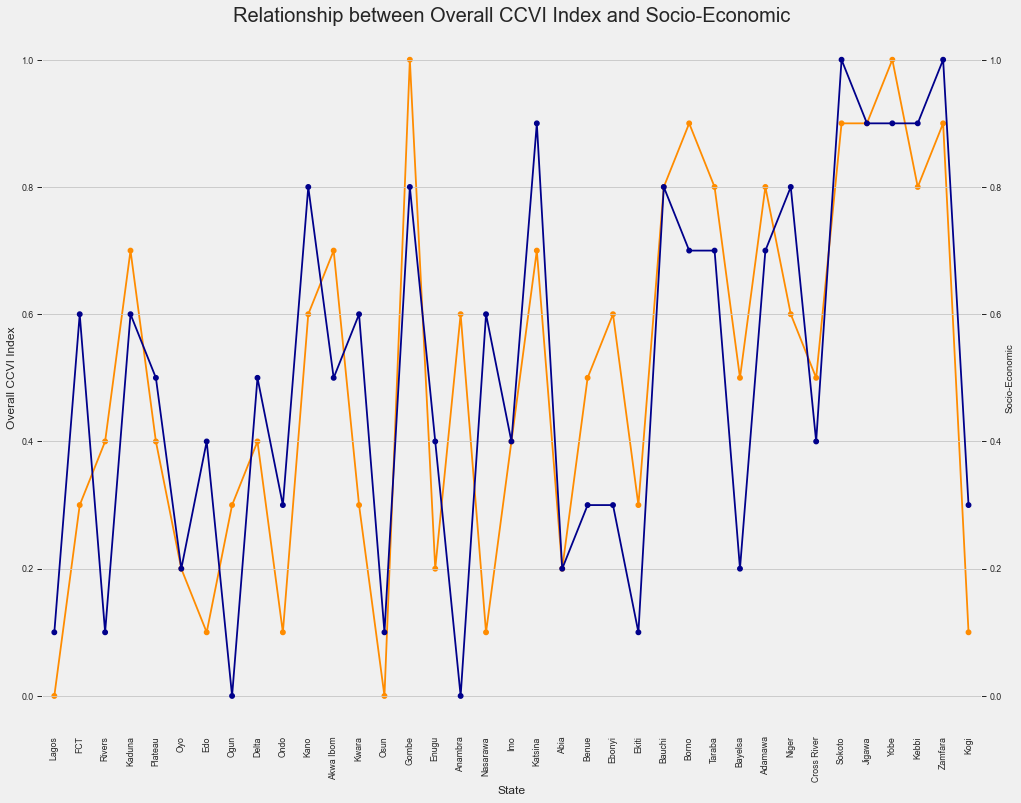

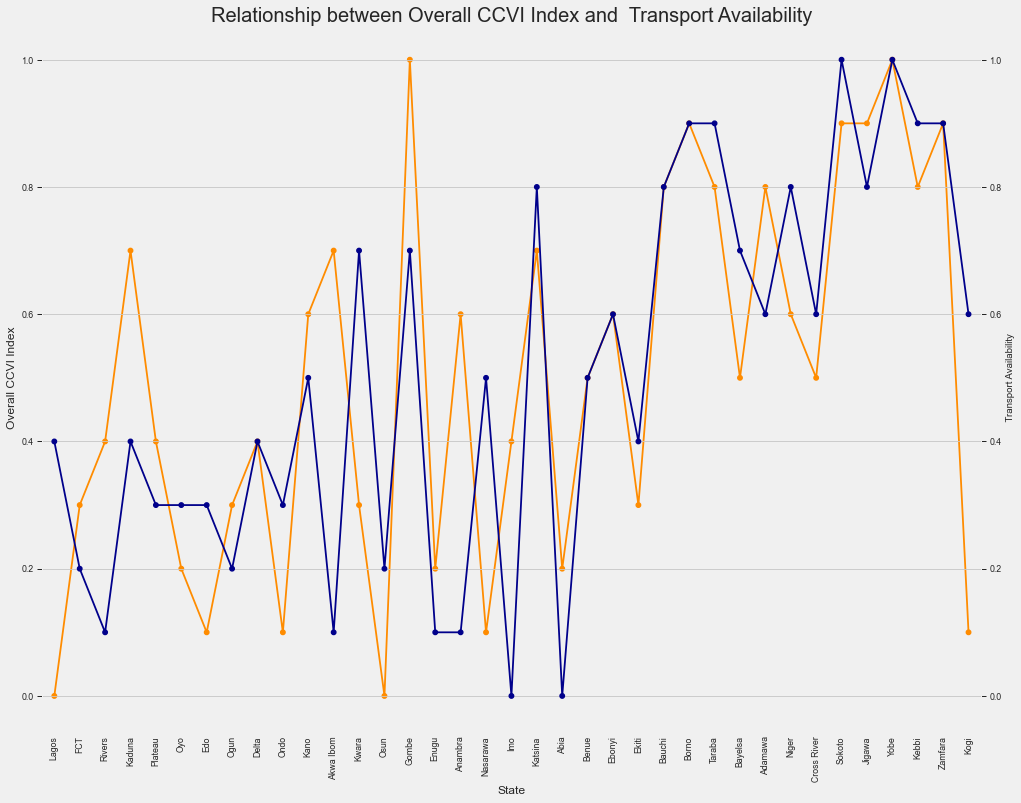

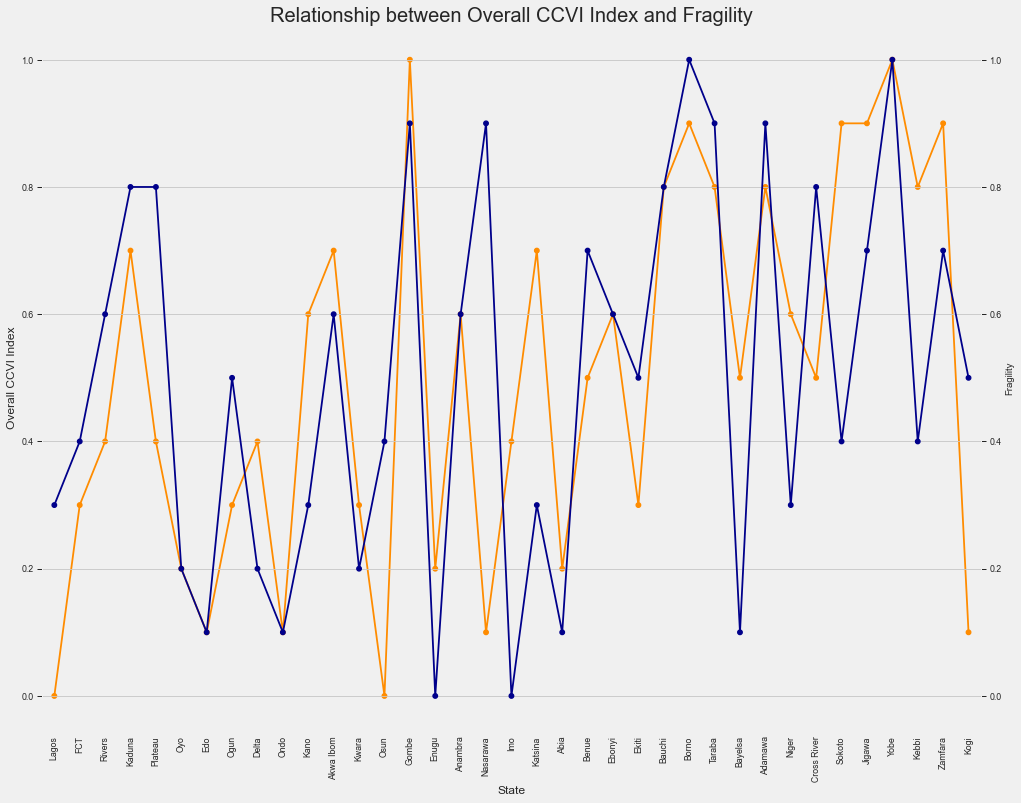

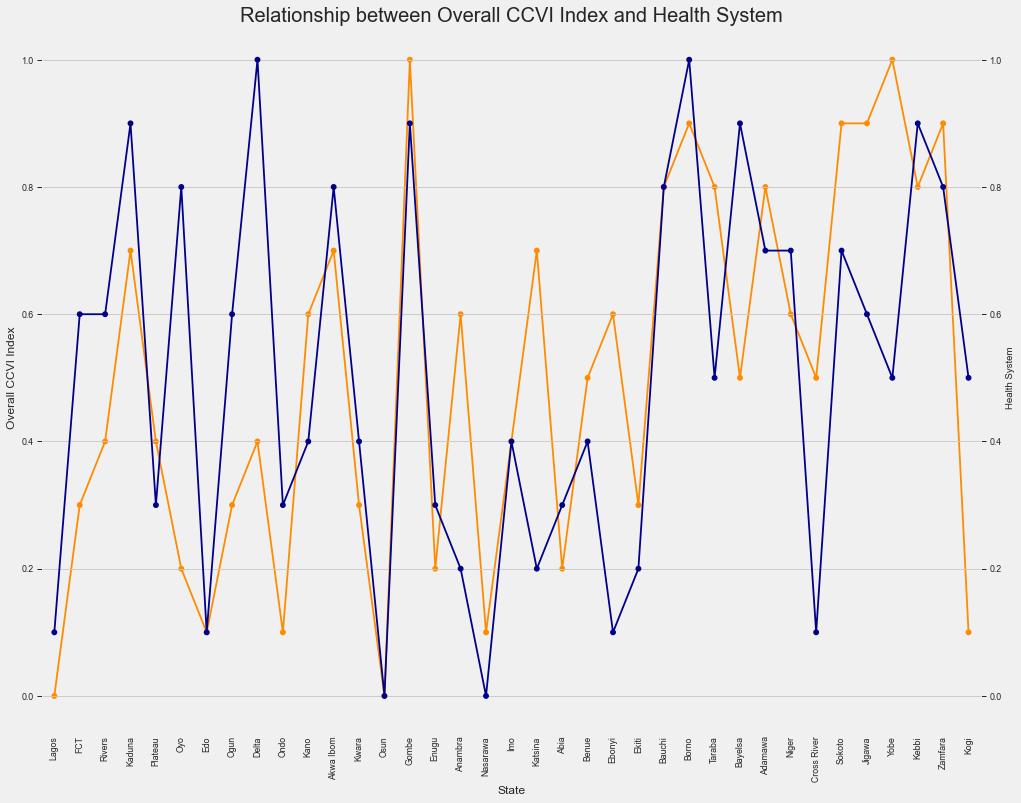

In [60]:
top_relating_features = merged_data.corr()['Overall CCVI Index'].abs().nlargest(5)
plot_relation('Overall CCVI Index', top_relating_features.index)

In [61]:
# The plot points closely tracking each other show very strong correlation to Vulnerability Index

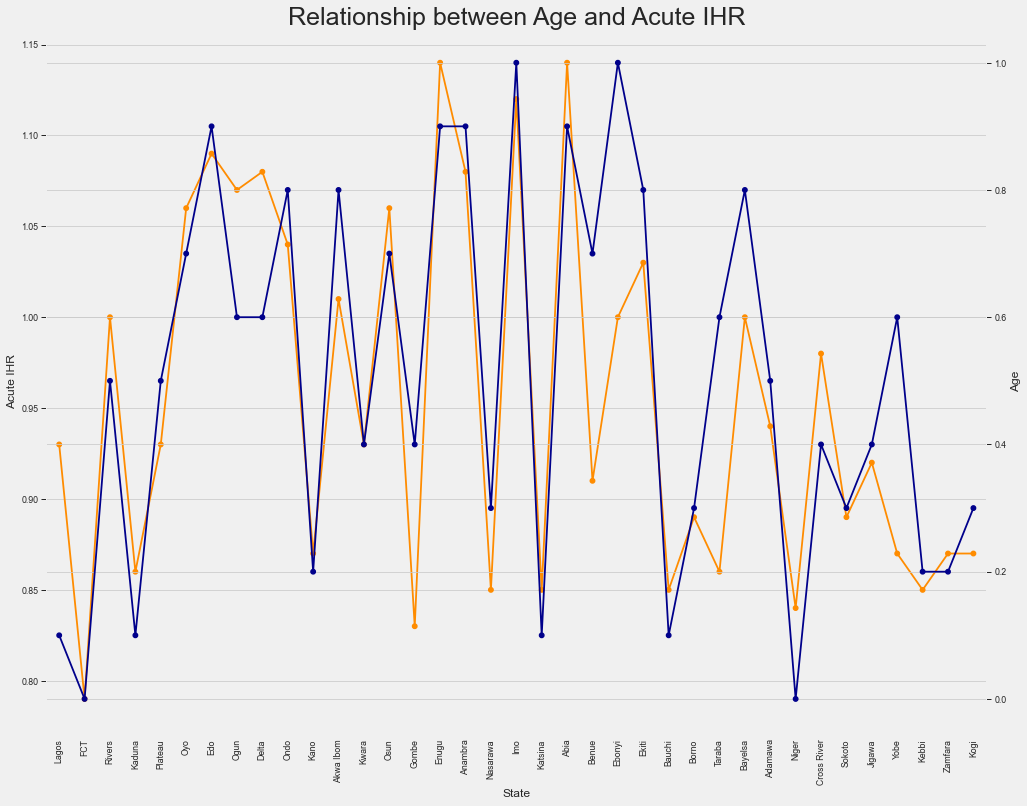

In [62]:
plt.figure(figsize = (15, 12))
plt.title('Relationship between Age and Acute IHR', fontsize = 25)

axis_1 = sns.pointplot(x = 'State', y = 'Acute IHR', data = merged_data, color = 'darkorange', markers = 'o')

plt.xlabel('State', fontsize = 12)
plt.ylabel('Acute IHR', fontsize = 12)
plt.xticks(rotation = 90)

axis_2 = axis_1.twinx()

sns.pointplot(x = 'State', y = 'Age', data = merged_data, ax = axis_2, color = 'darkblue', markers = 'o')

plt.ylabel('Age', fontsize = 12)

#plt.savefig('Relationship between Age and Acute IHR.png', dpi = 300, transparent = True)

plt.show()

In [63]:
# It is interesting to see the data conform strongly with the fact that the elderly in any place generally need greater health care than the youngsters. 

In [64]:
budget_data = budget_data.melt(id_vars = 'states', value_vars = ['Initial_budget (Bn)', 'Revised_budget (Bn)'], var_name = 'Budget Type', value_name = 'Budget Value')

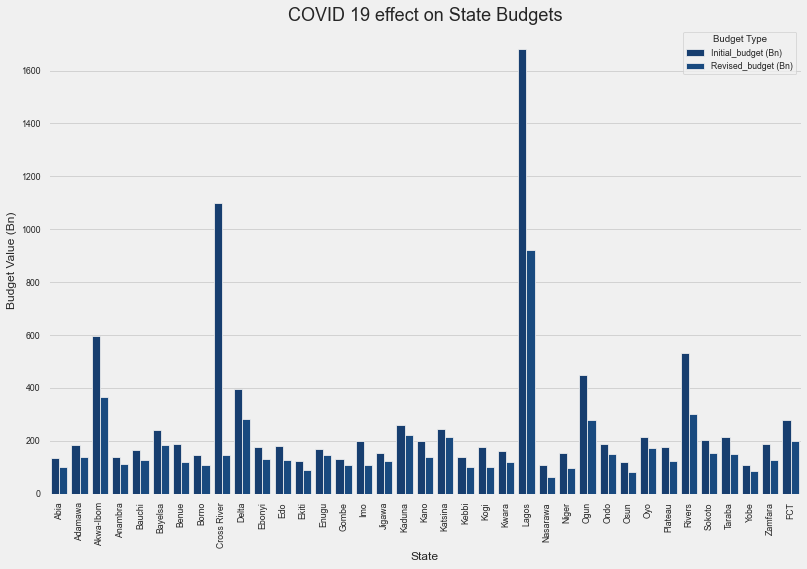

In [65]:
plt.figure(figsize = (12, 8))
plt.xticks(rotation = 90)
plt.title('COVID 19 effect on State Budgets', fontsize = 18)

sns.barplot(x = 'states', y = 'Budget Value', hue = 'Budget Type', data = budget_data, palette = theme)

plt.ylabel('Budget Value (Bn)', fontsize = 12)
plt.xlabel('State', fontsize = 12)

#plt.savefig('COVID 19 effect on State Budgets.png', dpi = 300, transparent = True)

plt.show()

In [66]:
# This plot shows how every state has had to revise its budget and probably allocate more to mitigating the effect of COVID 19.

In [67]:
percentages = merged_data['n_Confirmed'] / sum(merged_data['n_Confirmed'])

In [68]:
explode_mask = np.array([merged_data['n_Confirmed'] < 3000]).astype(int).reshape(37,) 

In [69]:
explode = []
for i in range(len(explode_mask)):
    if i > 0:
        explode.append(2 * (i / 30.0))
    else: explode.append(0)

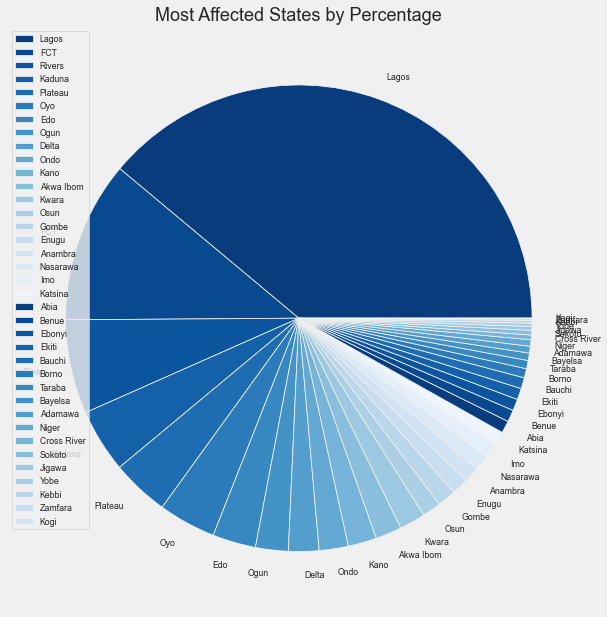

In [70]:
plt.figure(figsize = (12, 10))
plt.title('Most Affected States by Percentage', fontsize = 18)
plt.pie(percentages, labels = merged_data['State'], colors = theme)
plt.legend()
#plt.savefig('Most Affected States by Percentage', dpi = 500, transparent = True)
plt.show()

In [71]:
# This shows that Lagos State undoubtedly saw the biggest outburst of the virus. Followed by FCT, Rivers and Kaduna. It's no surprise that
# these cities are the most industrial in the country.

### TODO L - 
Determine the effect of the Pandemic on the economy. To do this, you will compare the Real GDP value Pre-COVID-19 with Real GDP in 2020 (COVID-19 Period, especially Q2 2020)
<br>
Steps
* From the Real GDP Data, generate a `barplot` using the GDP values for each year & quarters. For example: On x-axis you will have year 2017 and the bars will be values of each quarters(Q1-Q4). You expected to have subplots of each quarters on one graph.
<br>
Hint: Use [Pandas.melt](https://pandas.pydata.org/docs/reference/api/pandas.melt.html) to create your plot DataFrame 
* Set your quarter legend to lower left.
* Using `axhline`, draw a horizontal line through the graph at the value of Q2 2020.
* Write out your observation

In [72]:
gdp_data = gdp_data.melt(id_vars = 'Year', value_vars = ['Q1', 'Q2', 'Q3', 'Q4'], var_name = 'Quarter', value_name = 'GDP Value')

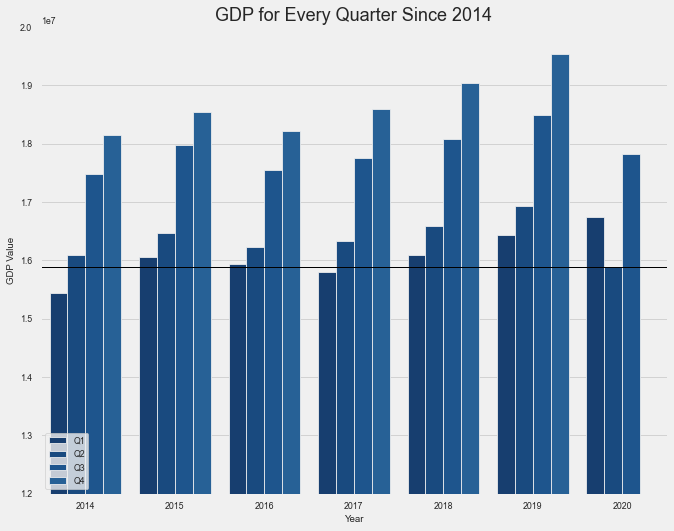

In [73]:
plt.figure(figsize = (10, 8))
plt.ylim(1.2e7, 2.0e7)
plt.title('GDP for Every Quarter Since 2014', fontsize = 18)
plt.axhline(gdp_data[gdp_data['Year'] == 2020][gdp_data['Quarter'] == 'Q2']['GDP Value'].values, color = 'black')

sns.barplot(x = 'Year', y = 'GDP Value', hue = 'Quarter', data = gdp_data, palette = theme)

plt.legend(loc = 'lower left')
#plt.savefig('GDP For Every Quarter Since 2014.png', dpi = 300, transparent = True)
plt.show()

In [74]:
# The plot shows a general trend of rising GDP over the quarters of every year except for the year 2020.
# In 2020, we see what seemed like it would be a great year given that it had the highest GDP in the last 6 years.
# This GDP took a massive hit in the beginning of the second quarter when the virus was first confirmed in the country (~ April, 2020)
# The second quarter GDP of 2020 was at an all time low.

### Note: Do not limit your analysis to the provided TODOs. Perform more analyses e.g 
* Check for more external dataset
* Ask more questions & find the right answers by exploring the data

In [75]:
vaccinations = pd.read_csv('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/vaccinations.csv')

In [76]:
ng_vaccinations = vaccinations[vaccinations['location'] == 'Nigeria']

In [77]:
ng_vaccinations = ng_vaccinations[['date', 'daily_vaccinations']]

In [78]:
ng_vaccinations[100:103]

,date,daily_vaccinations
71019,2021-06-12,39399.0
71020,2021-06-13,39399.0
71021,2021-06-14,39399.0


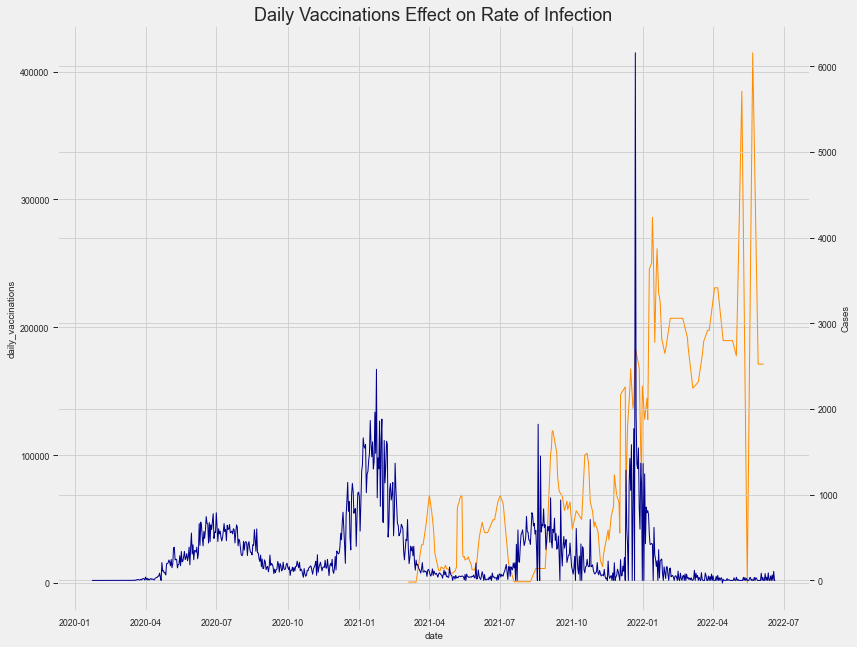

In [79]:
plt.figure(figsize = (12, 10))
plt.title('Daily Vaccinations Effect on Rate of Infection', fontsize = 18)

axis_1 = sns.lineplot(x = pd.to_datetime(ng_vaccinations['date']), y = ng_vaccinations['daily_vaccinations'], color = 'darkorange', markers = 'o')
axis_2 = axis_1.twinx()

sns.lineplot(x = ng_daily_confirmed.Date, y = daily_infection_rate, color = 'darkblue', markers = 'X')
#plt.savefig('Daily Vaccinations Effect on Rate of Infection', dpi = 300, transparent = True)

plt.show()

In [80]:
# The daily vaccinations rolled out (in orange) shows that vaccination is effective for curbing the spread of the virus. The massive spike in 
# vaccination caused a flattening of the curve which was the goal.